In [1]:
# import numpy as np
# import torch
# import torch.optim as optim
# import os
# import glob
# from PIL import Image
# import matplotlib.pyplot as plt
# import torchvision.transforms as T
# from torch.utils.data import Dataset, DataLoader
# import numpy as np
# %matplotlib inline

In [1]:
import os
import cv2
import time
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as T
from torchvision.utils import make_grid
from torchvision.models import resnet50

from sklearn.model_selection import train_test_split

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_path = "D:\pytorch_catsanddogs\dataset"

TRAIN_SET = dataset_path+"\\train"
TEST_SET = dataset_path+"\\test"

In [3]:
train_imgs = []
val_imgs = []
for roots,dirs,files in os.walk(TRAIN_SET):
    train_imgs.extend(files)
for root,dirs,files in os.walk(TEST_SET):
    val_imgs.extend(files)

In [4]:
def class_to_int(label):
    if label == 'cat':
        return 0
    if label == 'dog':
        return 1

In [5]:
def get_train_transform():
    return T.Compose([
        T.ToTensor(),
        T.Normalize((0, 0, 0),(1 , 1, 1))
    ])
def get_val_transform():
    return T.Compose([
        T.ToTensor(),
        T.Normalize((0, 0, 0),(1 , 1, 1))
    ])

In [13]:
class CreateDataset(Dataset):
    def __init__(self, imgs, mode = 'train', transforms=None):
        super().__init__()
        self.imgs = imgs
        self.mode = mode
        self.transforms = transforms
    
    def __getitem__(self, idx):
        image_name = self.imgs[idx]
        image_name_list = image_name.split('.')
        if self.mode == 'train':
            if image_name_list[0] == 'cat':
                img = Image.open(TRAIN_SET+'\\cats\\'+image_name)
            elif image_name_list[0] == 'dog':
                img = Image.open(TRAIN_SET+'\\dogs\\'+image_name)
        if self.mode == 'val':
            if image_name_list[0] == 'cat':
                img = Image.open(TEST_SET+'\\cats\\'+image_name)
            elif image_name_list[0] == 'dog':
                img = Image.open(TEST_SET+'\\dogs\\'+image_name)
            
        img = img.resize((224, 224))
        if self.mode == 'train' or self.mode == 'test':
            label = class_to_int(image_name_list[0])
            label = torch.tensor(label, dtype = torch.float32)
            
            img = self.transforms(img)
            
            return img, label
        
        elif self.mode == 'test':
            img = self.transforms(img)
            return img
        
    def __len__(self):
        return(len(self.imgs))    

In [14]:
train_dataset = CreateDataset(train_imgs, mode = 'train', transforms = get_train_transform())
val_dataset = CreateDataset(val_imgs, mode = 'val', transforms = get_val_transform())

In [20]:
train_data_loader = DataLoader(
            dataset = train_dataset,
            num_workers = 0,
            batch_size = 16,
            shuffle = True
)
val_data_loader = DataLoader(
            dataset = val_dataset,
            num_workers = 0,
            batch_size = 16,
            shuffle = True
)

In [21]:
train_dataset[0]

(tensor([[[0.7961, 0.8039, 0.8196,  ..., 0.9608, 0.9490, 0.9373],
          [0.7961, 0.8039, 0.8196,  ..., 0.9608, 0.9490, 0.9412],
          [0.7961, 0.8039, 0.8196,  ..., 0.9608, 0.9529, 0.9451],
          ...,
          [0.6039, 0.6039, 0.6118,  ..., 0.0118, 0.0118, 0.0118],
          [0.6000, 0.6000, 0.6039,  ..., 0.0078, 0.0078, 0.0078],
          [0.5922, 0.5961, 0.6000,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.6431, 0.6510, 0.6667,  ..., 0.8000, 0.7922, 0.7843],
          [0.6431, 0.6510, 0.6667,  ..., 0.8000, 0.7961, 0.7882],
          [0.6431, 0.6510, 0.6667,  ..., 0.8000, 0.8000, 0.7922],
          ...,
          [0.4824, 0.4863, 0.4902,  ..., 0.0118, 0.0118, 0.0118],
          [0.4784, 0.4784, 0.4824,  ..., 0.0078, 0.0078, 0.0078],
          [0.4706, 0.4745, 0.4784,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.3412, 0.3490, 0.3647,  ..., 0.4667, 0.4784, 0.4745],
          [0.3412, 0.3490, 0.3647,  ..., 0.4706, 0.4784, 0.4784],
          [0.3412, 0.3490, 0.3647,  ...,

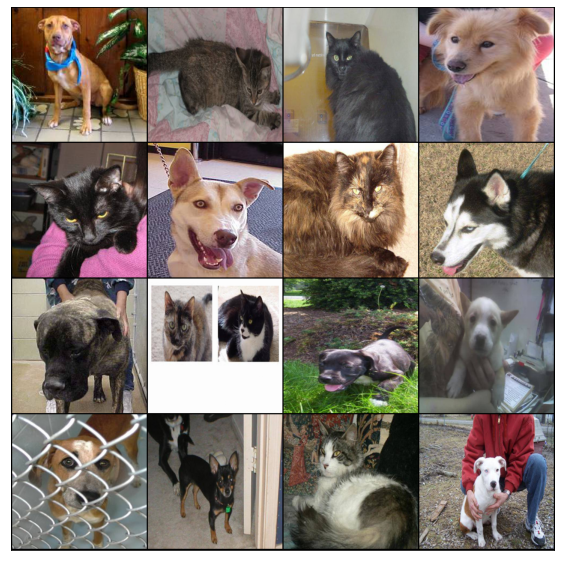

In [22]:
for images, labels in train_data_loader:
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

In [ ]:
# def show_images(images, nmax=64):
#     fig, ax = plt.subplots(figsize=(8, 8))
#     ax.set_xticks([]); ax.set_yticks([])
#     ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
# def show_batch(dl, nmax=64):
#     for images in dl:
#         show_images(images, nmax)
#         break
# show_batch(train_data_loader)